#  PCA 主成分分析法

对于一组特征$ (x_1,x_2,...x_n) $,求出特征中的最主要特征，也就是主成分分析
主要采用搜索测量进行主成分分析法求解。  
目标就是：  
求w，使得$ Var(X_n) = \frac{1}{m}\sum_{i=1}^{m}(X .*w)^2 $
 

主成分分析和线性回归不同：
- 主成分分析中，坐标轴为两个特征；线性回归中，横轴特征，纵轴为分类
- 主成分分析所求为坐标点到直线向量w的映射，因此表示出来为垂直于直线w； 线性回归为求MSE最小，因此并不垂直于直线w，而是平行于分类轴。


主成分分析法中第一步为demean，而不时常用的归一化

PCA 就是将高维数据向低维数据进行映射的方法
使用PCA找到前k个主成分k*n，从而将原来的m*n的数据（n个特征）映射到m*k的数据（矩阵乘法），将原来高维n数据映射到低维k数据；
上述过程的反过程基本上成立，从而可以产生一个数据压缩算法，也就是我们可以将大量的数据m*n,寻找一个k*n，映射为一个m*k，减少数据传输，到了接收端，在利用已知的k*n和m*k，恢复原始数据m*n（和原始数据不同，会存在误差，因为上述映射等同于信息损失的压缩过程，其实只能恢复k维中存在的信息，但是采用的是n维的表现形式）

# sklearn中的PCA


In [3]:
from pylab import *

In [9]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3.0 + np.random.normal(0,10.,size=100)

In [10]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[-0.79188192, -0.61067424]])

In [17]:
x_reduction = pca.transform(X)

In [18]:
x_reduction.shape

(100, 1)

In [19]:
xx = pca.inverse_transform(x_reduction)

In [20]:
xx.shape

(100, 2)

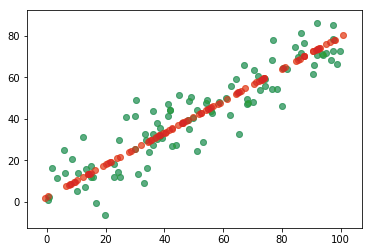

In [22]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(xx[:,0], xx[:,1], alpha=0.5)
plt.show()

In [23]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

Wall time: 13 ms


In [28]:
knn_clf.score(x_test, y_test)

0.98666666666666669

# 利用PCA提高速度

In [29]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [30]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

Wall time: 5 ms


In [31]:
knn_clf.score(x_test_reduction, y_test)

0.60666666666666669

### 需要找到合适的降维维度，PCA提供了解释方差比例来提供判断
pca.explained_variance_ratio_

In [33]:
pca.explained_variance_ratio_

array([ 0.14566817,  0.13735469])

In [34]:
# 先用全特征，输出维度的重要性
pca = PCA(n_components=64) 
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [36]:
# 给出了维度重要性，近似0的可以丢掉
pca.explained_variance_ratio_

array([  1.45668166e-01,   1.37354688e-01,   1.17777287e-01,
         8.49968861e-02,   5.86018996e-02,   5.11542945e-02,
         4.26605279e-02,   3.60119663e-02,   3.41105814e-02,
         3.05407804e-02,   2.42337671e-02,   2.28700570e-02,
         1.80304649e-02,   1.79346003e-02,   1.45798298e-02,
         1.42044841e-02,   1.29961033e-02,   1.26617002e-02,
         1.01728635e-02,   9.09314698e-03,   8.85220461e-03,
         7.73828332e-03,   7.60516219e-03,   7.11864860e-03,
         6.85977267e-03,   5.76411920e-03,   5.71688020e-03,
         5.08255707e-03,   4.89020776e-03,   4.34888085e-03,
         3.72917505e-03,   3.57755036e-03,   3.26989470e-03,
         3.14917937e-03,   3.09269839e-03,   2.87619649e-03,
         2.50362666e-03,   2.25417403e-03,   2.20030857e-03,
         1.98028746e-03,   1.88195578e-03,   1.52769283e-03,
         1.42823692e-03,   1.38003340e-03,   1.17572392e-03,
         1.07377463e-03,   9.55152460e-04,   9.00017642e-04,
         5.79162563e-04,

绘制维度重要性曲线

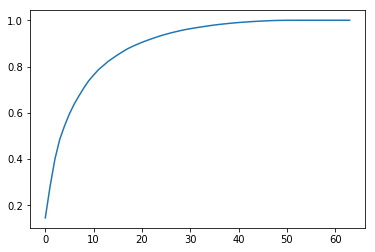

In [37]:
plt.plot([i for i in range(x_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [47]:
# 上述重要性曲线功能封装在sklearn的PCA中，也就是不要传入n_component,而是传入重要性程度，自动计算n_components;但是2维有一个特殊的好处，
# 可以可视化
pca = PCA(0.95) 
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [48]:
pca.n_components_

28

In [49]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

Wall time: 6 ms


In [50]:
knn_clf.score(x_test_reduction,y_test)

0.97999999999999998

#   PCA处理MNIST

In [55]:
from sklearn.datasets import fetch_mldata

In [57]:
mnist = fetch_mldata('MNIST original')

In [58]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [62]:
X,y = mnist['data'],mnist['target']

In [63]:
X.shape

(70000, 784)

In [64]:
x_train = np.array(X[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
x_test = np.array(X[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)


In [66]:
# too slow to run
#knn_clf = KNeighborsClassifier()
#knn_clf.fit(x_train, y_train)
#knn_clf.score(x_test, y_test)
# 0.968...

### 使用pca降维

In [68]:
pca = PCA(0.9)
pca.fit(x_train)
x_train_reduction  = pca.transform(x_train)

In [70]:
x_train_reduction.shape

(60000, 87)

In [71]:
x_test_reduction = pca.transform(x_test)

In [72]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(x_train_reduction, y_train)

Wall time: 1.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
%time knn_clf.score(x_test_reduction, y_test)

Wall time: 2min 33s


0.9728

### PCA可以对数据降噪

### PCA生成特征脸，专用于人脸识别领域